In [30]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 6.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
# Data preprocessing

# (a) import
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# loading data
df = pd.read_csv('disney_movie_total_gross.csv')

# Convert 'Date Released' column to datetime format
df['Date Released'] = pd.to_datetime(df['Date Released'])

# Extract 'Year Released' and 'Month Released' for further analysis
df['Year Released'] = df['Date Released'].dt.year
df['Month Released'] = df['Date Released'].dt.month

# Replace 'Unknown' with NaN
df['MPAA Rating'] = df['MPAA Rating'].replace('Unknown', np.nan)
# Replace 0 values in 'Total Gross' and 'Inflation Adjusted Gross' with NaN
df['Total Gross'] = df['Total Gross'].replace(0, np.nan)
df['Inflation Adjusted Gross'] = df['Inflation Adjusted Gross'].replace(0, np.nan)

# Drop duplicate movie titles, keeping the first occurrence
df = df.drop_duplicates(subset='Movie Title', keep='first')

df = df.dropna(thresh=len(df.columns) - 2)


/var/folders/sj/lc7th3zj6lz43xv6y51vy0v80000gq/T/ipykernel_71468/449244291.py:14: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date Released'] = pd.to_datetime(df['Date Released'])


<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 578
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Movie Title               569 non-null    object        
 1   Date Released             569 non-null    datetime64[ns]
 2   Genre                     569 non-null    object        
 3   MPAA Rating               517 non-null    object        
 4   Total Gross               569 non-null    float64       
 5   Inflation Adjusted Gross  569 non-null    float64       
 6   Year Released             569 non-null    int32         
 7   Month Released            569 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(3)
memory usage: 35.6+ KB
None
                       Date Released   Total Gross  Inflation Adjusted Gross  \
count                            569  5.690000e+02              5.690000e+02   
mean   1998-07-19 10:22:33.9543057

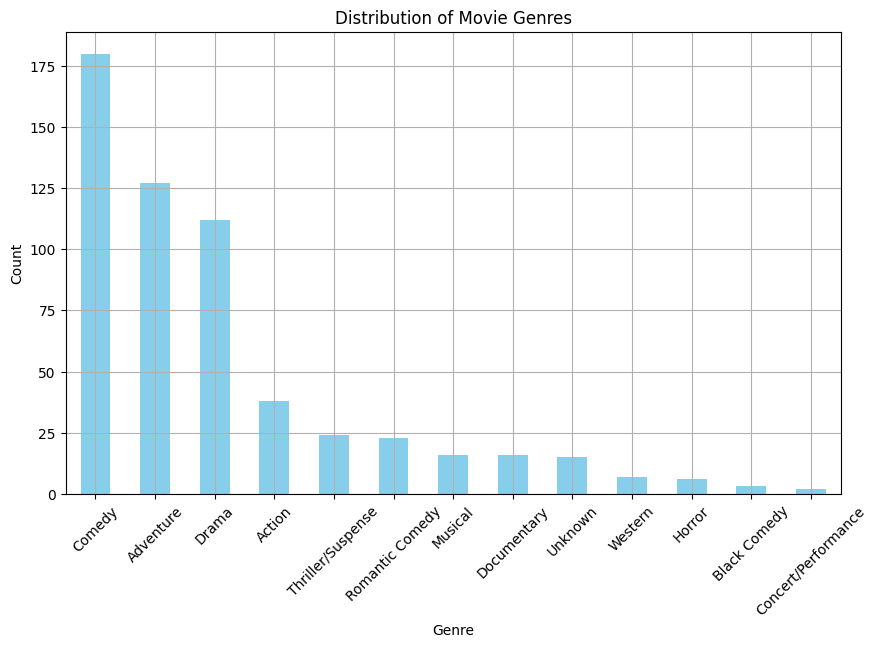

In [32]:
# 1. Dataset Overview and Summary Statistics
print(df.info())  # Overview of dataset
print(df.describe())  # Summary statistics for numeric columns

# Count the number of entries for each genre (to check for over-representation)
genre_counts = df['Genre'].value_counts()

# Plot the distribution of genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Conclusion 1:
Over-representation of genres: This bar plot will show you which genres are most common in the dataset.
For example, if "Animation" or "Adventure" is over-represented, it could influence the outcome of the total gross comparison or other analyses.


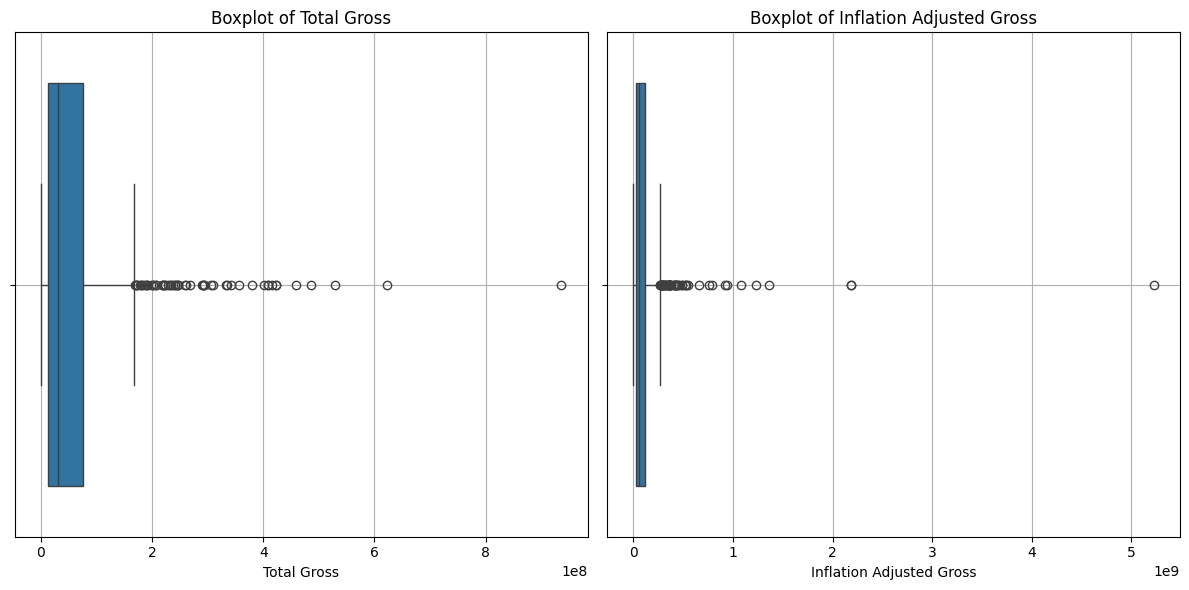

In [33]:
# 2. Outlier Detection
# Plotting boxplots for Total Gross and Inflation Adjusted Gross
plt.figure(figsize=(12, 6))

# Boxplot for Total Gross
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Total Gross'])
plt.title('Boxplot of Total Gross')
plt.grid(True)

# Boxplot for Inflation Adjusted Gross
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Inflation Adjusted Gross'])
plt.title('Boxplot of Inflation Adjusted Gross')
plt.grid(True)

plt.tight_layout()
plt.show()

Conclusion 2: From these boxplots, you can spot any extreme outliers in both Total Gross and Inflation Adjusted Gross. You might find that certain movies (such as "The Lion King" or "Frozen") significantly outperform others, skewing the dataset. This could affect how we calculate average gross revenue and require special attention in your primary analysis technique.

Null Hypothesis (H₀):
The mean Total Gross for movies across different MPAA ratings is the same. In other words, MPAA ratings do not significantly impact the total gross.

Alternative Hypothesis (H₁):
At least one MPAA rating category has a mean Total Gross that is significantly different from the others. In other words, the MPAA rating has an impact on the total gross of movies.

ANOVA Test Result: F-statistic = 8.602421874762651 p-value = 1.402228438630653e-05


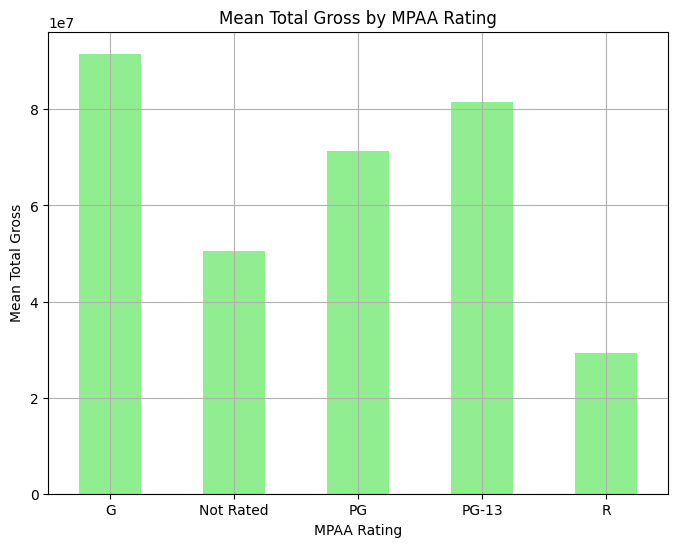

In [34]:
# 3. Hypothesis Testing: MPAA Rating vs Total Gross
# To explore whether the MPAA rating significantly impacts a movie's total gross, 
# we can use an ANOVA (Analysis of Variance) test. This will help determine whether the differences 
# in means across different ratings (e.g., G, PG, PG-13) are statistically significant.

# Group by MPAA rating and calculate the mean of Total Gross
mpaa_groups = df.groupby('MPAA Rating')['Total Gross'].mean()

# ANOVA test to see if there's a significant difference in Total Gross across MPAA Ratings
anova_result = stats.f_oneway(
    df[df['MPAA Rating'] == 'G']['Total Gross'],
    df[df['MPAA Rating'] == 'PG']['Total Gross'],
    df[df['MPAA Rating'] == 'PG-13']['Total Gross'],
    df[df['MPAA Rating'] == 'R']['Total Gross']
)

print("ANOVA Test Result: F-statistic =", anova_result.statistic, "p-value =", anova_result.pvalue)

# Plot the mean Total Gross for each MPAA Rating
plt.figure(figsize=(8, 6))
mpaa_groups.plot(kind='bar', color='lightgreen')
plt.title('Mean Total Gross by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Mean Total Gross')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()



Conclusion 3:
Beacuse the p-value ≤ 0.05 we can reject the null hypothesis, meaning that MPAA ratings do significantly affect the Total Gross. The ANOVA test will reveal if there's a statistically significant difference in the mean gross between different MPAA ratings. The accompanying bar chart will make this clear visually, showing which rating category tends to generate higher revenues. 
